<a href="https://colab.research.google.com/github/Elavat9000/Challenge-ONE-Data-Science-Telecom-X-parte-2/blob/main/Telecom_X_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracción del Archivo Tratado

In [42]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
url = 'https://raw.githubusercontent.com/Elavat9000/Challenge-ONE-Data-Science-Telecom-X-parte-2/refs/heads/main/Data/datos_tratados.csv'

In [3]:
datos = pd.read_csv(url)

In [4]:
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias,PaymentMethod_bank transfer (automatic),PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check,ServiciosContratados,Cancelacion
0,0002orfbo,0,1,0,1,1,9,1,0,1,...,1,65.6,593.30,2.186667,False,False,False,True,4,No Canceló
1,0003mknfe,0,0,0,0,0,9,1,1,1,...,0,59.9,542.40,1.996667,False,False,False,True,3,No Canceló
2,0004tlhlj,1,0,0,0,0,4,1,0,2,...,1,73.9,280.85,2.463333,False,False,True,False,2,Canceló
3,0011igkff,1,0,1,1,0,13,1,0,2,...,1,98.0,1237.85,3.266667,False,False,True,False,5,Canceló
4,0013exchz,1,1,1,1,0,3,1,0,2,...,1,83.9,267.40,2.796667,False,False,False,True,3,Canceló


#Eliminación de Columnas Irrelevantes

In [5]:
datos = datos.drop(['customerID'], axis=1)
datos = datos.drop(['Cancelacion'], axis=1)

#Encoding

In [6]:
columnas_boleanas = [
    'PaymentMethod_bank transfer (automatic)',
    'PaymentMethod_credit card (automatic)',
    'PaymentMethod_electronic check',
    'PaymentMethod_mailed check'
]

# Convertirlas a enteros
datos[columnas_boleanas] = datos[columnas_boleanas].astype(int)

In [7]:
datos.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias,PaymentMethod_bank transfer (automatic),PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check,ServiciosContratados
0,0,1,0,1,1,9,1,0,1,0,...,1,1,65.6,593.30,2.186667,0,0,0,1,4
1,0,0,0,0,0,9,1,1,1,0,...,0,0,59.9,542.40,1.996667,0,0,0,1,3
2,1,0,0,0,0,4,1,0,2,0,...,0,1,73.9,280.85,2.463333,0,0,1,0,2
3,1,0,1,1,0,13,1,0,2,0,...,0,1,98.0,1237.85,3.266667,0,0,1,0,5
4,1,1,1,1,0,3,1,0,2,0,...,0,1,83.9,267.40,2.796667,0,0,0,1,3


In [8]:
datos['InternetService'] = datos['InternetService'].map({0: 'no', 1: 'dsl', 2: 'fiber optic'})
datos['Contract'] = datos['Contract'].map({0: 'month to month', 1: 'one year', 2: 'two year'})

##df['gender'] = df['gender'].map({'male': 0, 'female': 1})

In [9]:
datos.sample(5)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias,PaymentMethod_bank transfer (automatic),PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check,ServiciosContratados
1999,0,0,0,1,1,69,1,1,dsl,1,...,two year,0,86.90,6194.10,2.896667,1,0,0,0,7
6872,1,1,0,0,0,4,1,0,fiber optic,1,...,month to month,1,94.40,387.20,3.146667,1,0,0,0,5
1398,1,1,1,0,0,7,1,0,fiber optic,1,...,month to month,0,76.45,503.60,2.548333,1,0,0,0,2
1440,0,1,1,0,0,7,1,0,fiber optic,0,...,month to month,1,84.35,609.65,2.811667,0,0,1,0,3
1026,1,0,0,0,0,28,1,1,fiber optic,1,...,month to month,1,94.50,2659.40,3.150000,0,1,0,0,5


In [10]:
categoricas = ['InternetService', 'Contract']

pd.get_dummies(data=datos,columns=categoricas, dtype=int).head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check,ServiciosContratados,InternetService_dsl,InternetService_fiber optic,InternetService_no,Contract_month to month,Contract_one year,Contract_two year
0,0,1,0,1,1,9,1,0,0,1,...,0,0,1,4,1,0,0,0,1,0
1,0,0,0,0,0,9,1,1,0,0,...,0,0,1,3,1,0,0,1,0,0
2,1,0,0,0,0,4,1,0,0,0,...,0,1,0,2,0,1,0,1,0,0
3,1,0,1,1,0,13,1,0,0,1,...,0,1,0,5,0,1,0,1,0,0
4,1,1,1,1,0,3,1,0,0,0,...,0,0,1,3,0,1,0,1,0,0


In [11]:
datos_codificados = pd.get_dummies(data=datos,columns=categoricas, dtype=int)

In [12]:
datos_codificados

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check,ServiciosContratados,InternetService_dsl,InternetService_fiber optic,InternetService_no,Contract_month to month,Contract_one year,Contract_two year
0,0,1,0,1,1,9,1,0,0,1,...,0,0,1,4,1,0,0,0,1,0
1,0,0,0,0,0,9,1,1,0,0,...,0,0,1,3,1,0,0,1,0,0
2,1,0,0,0,0,4,1,0,0,0,...,0,1,0,2,0,1,0,1,0,0
3,1,0,1,1,0,13,1,0,0,1,...,0,1,0,5,0,1,0,1,0,0
4,1,1,1,1,0,3,1,0,0,0,...,0,0,1,3,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,0,0,13,1,0,1,0,...,0,0,1,3,1,0,0,0,1,0
7039,1,0,0,1,0,22,1,1,0,0,...,0,1,0,3,0,1,0,1,0,0
7040,0,0,0,0,0,2,1,0,0,1,...,0,0,1,2,1,0,0,1,0,0
7041,0,0,0,1,1,67,1,0,1,0,...,0,0,1,5,1,0,0,0,0,1


#Verificación de la Proporción de Cancelación (Churn)

In [13]:
proporcion = datos['Churn'].value_counts(normalize=True)
proporcion

,proportion
Churn,
0,0.73463
1,0.26537


In [14]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Churn                                    7043 non-null   int64  
 1   gender                                   7043 non-null   int64  
 2   SeniorCitizen                            7043 non-null   int64  
 3   Partner                                  7043 non-null   int64  
 4   Dependents                               7043 non-null   int64  
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   int64  
 7   MultipleLines                            7043 non-null   int64  
 8   OnlineSecurity                           7043 non-null   int64  
 9   OnlineBackup                             7043 non-null   int64  
 10  DeviceProtection                         7043 no

#Análisis de Correlación

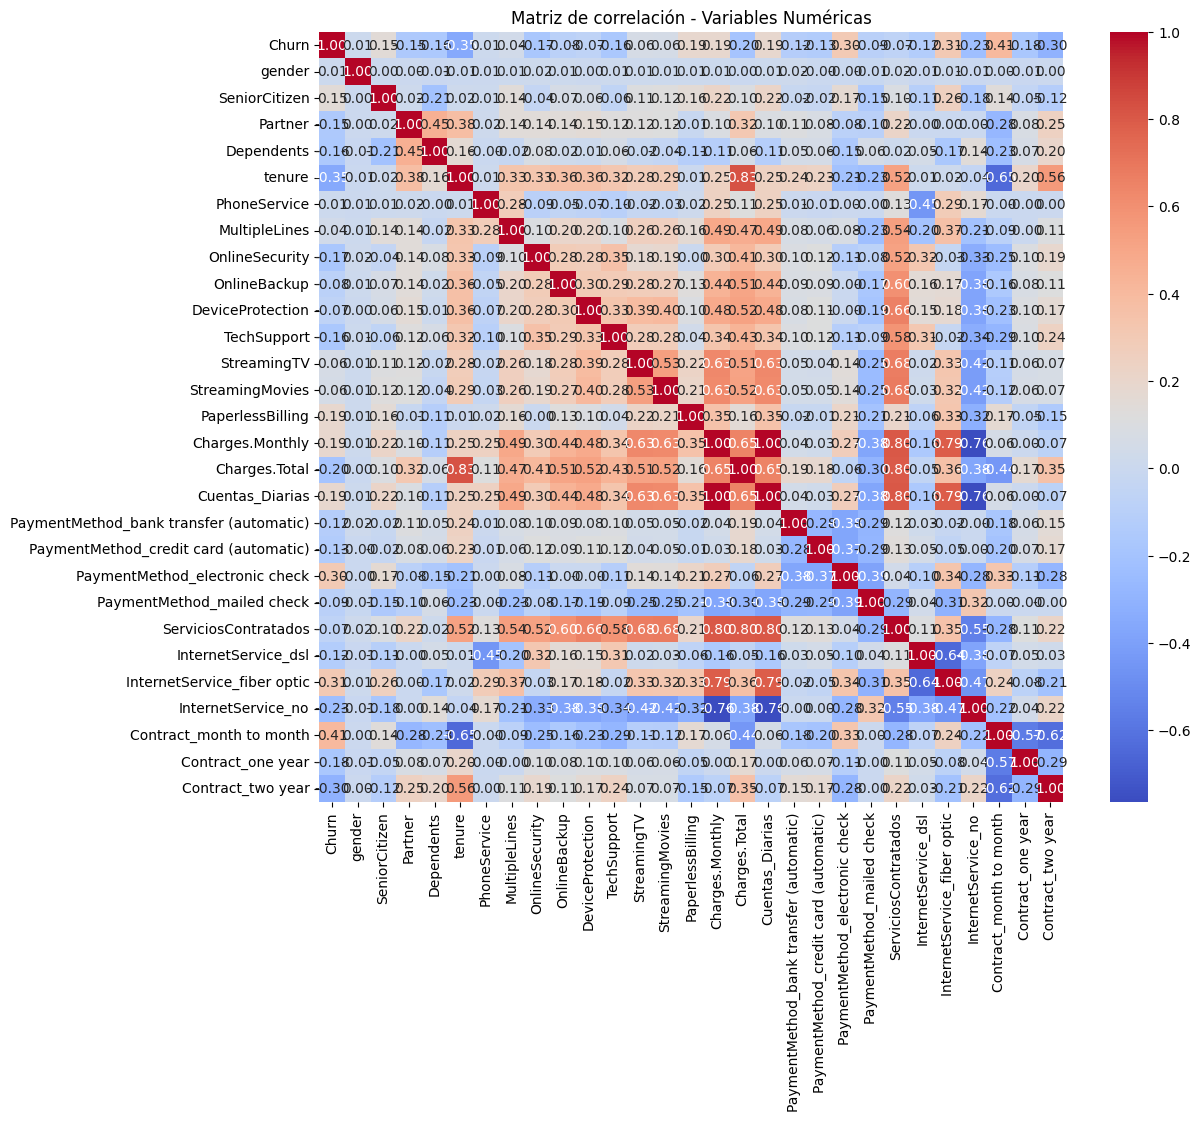

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

num_df = datos_codificados.select_dtypes(include=np.number)
plt.figure(figsize=(12,10))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación - Variables Numéricas')
plt.show()

In [16]:
num_vars = datos_codificados.select_dtypes(include=np.number).columns.drop('Churn')
corr_churn = datos_codificados[num_vars].corrwith(datos_codificados['Churn'])
corr_churn_datos_codificados = corr_churn.to_frame().reset_index()
corr_churn_datos_codificados.columns = ['Variable', 'Correlación_con_Churn']
corr_churn_datos_codificados['Correlación_abs'] = corr_churn_datos_codificados['Correlación_con_Churn'].abs()
corr_churn_datos_codificados = corr_churn_datos_codificados.sort_values(by='Correlación_abs', ascending=False).reset_index(drop=True)
corr_churn_datos_codificados

,Variable,Correlación_con_Churn,Correlación_abs
0,Contract_month to month,0.405103,0.405103
1,tenure,-0.352229,0.352229
2,InternetService_fiber optic,0.308020,0.308020
3,Contract_two year,-0.302253,0.302253
4,PaymentMethod_electronic check,0.301919,0.301919
5,InternetService_no,-0.227890,0.227890
6,Charges.Total,-0.198324,0.198324
7,Cuentas_Diarias,0.193356,0.193356
8,Charges.Monthly,0.193356,0.193356
9,PaperlessBilling,0.191825,0.191825


## Correlación con Churn (Cancelación de servicio)

### Variables con mayor correlación positiva (más relacionadas con cancelar):

- **Contract_month to month (0.40)**: Clientes con contrato mes a mes tienen mayor probabilidad de cancelar.
- **InternetService_fiber optic (0.31)**: Clientes con fibra óptica tienden más a cancelar.
- **PaymentMethod_electronic check (0.30)**: Pago con cheque electrónico se asocia con más cancelaciones.
- **Cuentas_Diarias y Charges.Monthly (~0.19)**: A mayor consumo mensual y cuentas diarias, ligera correlación con churn positivo.

### Variables con mayor correlación negativa (asociadas a NO cancelar):

- **tenure (-0.35)**: Más meses con la empresa, menos probabilidad de cancelar.
- **Contract_two year (-0.30)**: Contratos a dos años tienen menos cancelaciones.
- **InternetService_no (-0.22)**: Clientes sin servicio de internet tienen menos churn.
- **Charges.Total (-0.19)**: Más gasto total está relacionado con quedarse más tiempo.

### Otras observaciones:

- Variables como `PaperlessBilling`, `OnlineSecurity`, `TechSupport` tienen correlaciones pequeñas pero negativas, indicando que ciertos servicios adicionales podrían ayudar a reducir churn.
- **SeniorCitizen** tiene una correlación positiva moderada (0.15), puede indicar que clientes mayores tienen algo más de tendencia a cancelar.
- **gender** prácticamente no tiene correlación (0.008), por lo que no afecta casi nada.

#Análisis Dirigido

##Tiempo de contrato (tenure) vs Cancelación (Churn)

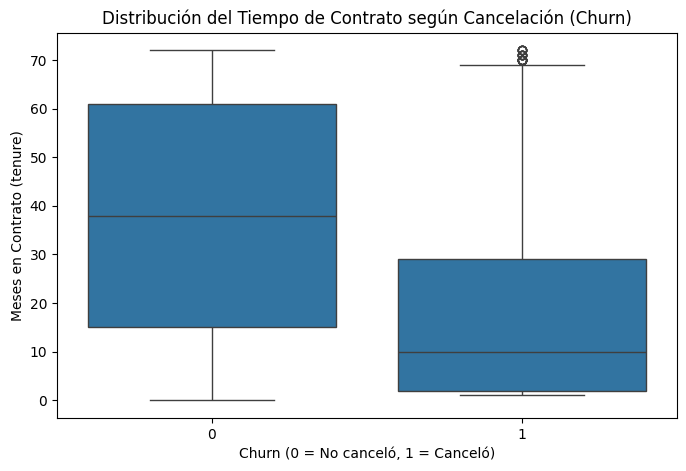

In [17]:
#{'Yes':1, 'No':0}

plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='tenure', data=datos_codificados)
plt.title('Distribución del Tiempo de Contrato según Cancelación (Churn)')
plt.xlabel('Churn (0 = No canceló, 1 = Canceló)')
plt.ylabel('Meses en Contrato (tenure)')
plt.show()

##Gasto Total (Charges.Total) vs Cancelación (Churn)

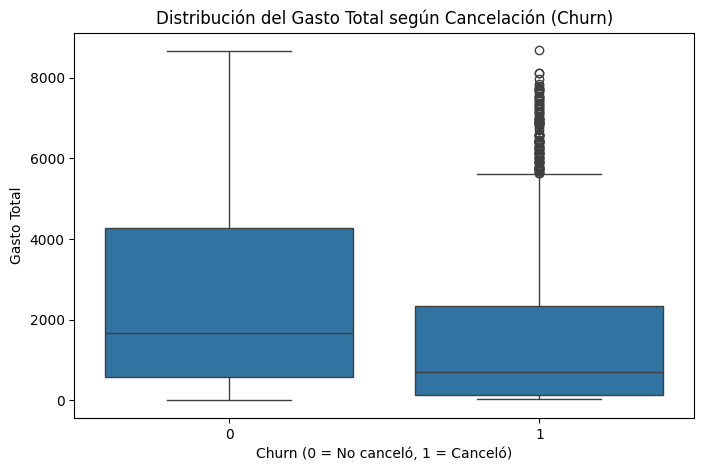

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='Charges.Total', data=datos_codificados)
plt.title('Distribución del Gasto Total según Cancelación (Churn)')
plt.xlabel('Churn (0 = No canceló, 1 = Canceló)')
plt.ylabel('Gasto Total')
plt.show()

##Scatter plot de tenure vs Charges.Total con color por Churn

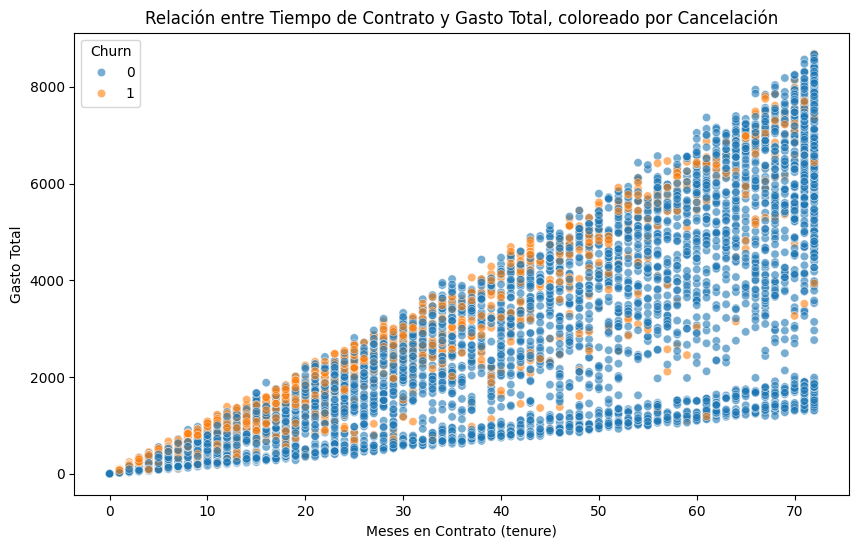

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='tenure', y='Charges.Total', hue='Churn', data=datos_codificados, alpha=0.6)
plt.title('Relación entre Tiempo de Contrato y Gasto Total, coloreado por Cancelación')
plt.xlabel('Meses en Contrato (tenure)')
plt.ylabel('Gasto Total')
plt.legend(title='Churn')
plt.show()

#División Train/Test

In [20]:
from sklearn.model_selection import train_test_split

X = datos_codificados.drop('Churn', axis=1)
y = datos_codificados['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Distribución en train:\n{y_train.value_counts()}")
print(f"Distribución en test:\n{y_test.value_counts()}")


Distribución en train:
Churn
0    3622
1    1308
Name: count, dtype: int64
Distribución en test:
Churn
0    1552
1     561
Name: count, dtype: int64


#Balanceo de Clases

#Creación de Modelos

##Baseline: DummyClassifier

In [21]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

## Modelo 1: Random Forest (NO requiere escalado)

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Modelo 2: KNN

In [24]:
from sklearn.preprocessing import StandardScaler

num_cols = ['tenure', 'Charges.Monthly', 'Charges.Total']

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

###Escalado de Variables Numéricas para aplicacion de KNN.


In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [26]:
knn.score(X_train_scaled, y_train)

0.8421906693711968

#Función para Evaluar Modelos



In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluar_modelo(nombre, modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)

    print(f"\nResultados para: {nombre}")
    print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precisión: {precision_score(y_test, y_pred, zero_division=0):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
    print("Matriz de confusión:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)

In [28]:
# Baseline
evaluar_modelo("DummyClassifier (Baseline)", dummy, X_test, y_test)
print(f"Score del entrenamiento: ", dummy.score(X_train, y_train))

# KNN
evaluar_modelo("KNN", knn, X_test_scaled, y_test)
print(f"Score del entrenamiento: ", knn.score(X_train_scaled, y_train))

# Random Forest
evaluar_modelo("Random Forest", rf, X_test, y_test)
print(f"Score del entrenamiento: ", rf.score(X_train, y_train))


Resultados para: DummyClassifier (Baseline)
Exactitud (Accuracy): 0.7345
Precisión: 0.0000
Recall: 0.0000
F1-score: 0.0000
Matriz de confusión:
[[1552    0]
 [ 561    0]]
--------------------------------------------------
Score del entrenamiento:  0.734685598377282

Resultados para: KNN
Exactitud (Accuracy): 0.7487
Precisión: 0.5280
Recall: 0.5045
F1-score: 0.5160
Matriz de confusión:
[[1299  253]
 [ 278  283]]
--------------------------------------------------
Score del entrenamiento:  0.8421906693711968

Resultados para: Random Forest
Exactitud (Accuracy): 0.7847
Precisión: 0.6123
Recall: 0.5152
F1-score: 0.5595
Matriz de confusión:
[[1369  183]
 [ 272  289]]
--------------------------------------------------
Score del entrenamiento:  0.9977687626774848


#Análisis crítico y comparación los modelos

📊 Resumen de métricas clave

| Modelo           | Accuracy | Precisión | Recall | F1-score | Entrenamiento |
|------------------|----------|-----------|--------|----------|---------------|
| DummyClassifier  | 0.7345   | 0.0000    | 0.0000 | 0.0000   | -             |
| KNN              | 0.7487   | 0.5280    | 0.5045 | 0.5160   | 0.8422        |
| Random Forest    | 0.7847   | 0.6123    | 0.5152 | 0.5595   | 0.9978        |


 2. KNN
- Mejora en comparacion del modelo dummy F1=0.51.
- En entrenamiento es bueno 0.84, pero en la vida real baja a 0.74.
- Problema: Se memoriza demasiado los datos de entrenamiento generando el overfitting.
- Solución: Probablemente ajustar n_neighbors para que no memorice.

 3. Random Forest
- Accuracy (78%), F1 (0.56).
- Problema:En entrenamiento su resultado es de 99.7%, pero en prueba baja bastante.
- Solucion: ajustar profundidad del árbol, para que pueda regular el overfiting.

#Ajustar hiperparámetros para evitar overfitting

In [29]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    class_weight='balanced',
    random_state=42
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [30]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Distribución antes de SMOTE (train):")
print(y_train.value_counts())
print("\nDistribución después de SMOTE (train):")
print(y_train_bal.value_counts())


Distribución antes de SMOTE (train):
Churn
0    3622
1    1308
Name: count, dtype: int64

Distribución después de SMOTE (train):
Churn
0    3622
1    3622
Name: count, dtype: int64


In [31]:
num_cols = ['tenure', 'Charges.Monthly', 'Charges.Total']
scaler = StandardScaler()

X_train_bal_scaled = X_train_bal.copy()
X_test_scaled = X_test.copy()

X_train_bal_scaled[num_cols] = scaler.fit_transform(X_train_bal[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])


In [32]:
mejor_k = 0
mejor_f1 = 0
for k in range(3, 21, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_bal_scaled, y_train_bal)
    pred = knn.predict(X_test_scaled)
    f1 = f1_score(y_test, pred)
    print(f"k={k} -> F1-score: {f1:.4f}")
    if f1 > mejor_f1:
        mejor_f1 = f1
        mejor_k = k

print(f"\n✅ Mejor k encontrado: {mejor_k} con F1-score de {mejor_f1:.4f}")
knn_model = KNeighborsClassifier(n_neighbors=mejor_k,weights='distance')
knn_model.fit(X_train_bal_scaled, y_train_bal)
y_pred_knn = knn_model.predict(X_test_scaled)


k=3 -> F1-score: 0.5469
k=5 -> F1-score: 0.5532
k=7 -> F1-score: 0.5643
k=9 -> F1-score: 0.5793
k=11 -> F1-score: 0.5785
k=13 -> F1-score: 0.5855
k=15 -> F1-score: 0.5953
k=17 -> F1-score: 0.6070
k=19 -> F1-score: 0.6103

✅ Mejor k encontrado: 19 con F1-score de 0.6103


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluar_modelo(nombre, modelo, y_true, y_pred, X_train):
    print(f"\nResultados para: {nombre}")
    print(f"Exactitud (Accuracy): {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precisión: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_true, y_pred):.4f}")
    print("Matriz de confusión:")
    print(confusion_matrix(y_true, y_pred))
    print("-"*50)
    print("Score del entrenamiento: ", modelo.score(X_train, y_train_bal if nombre == "KNN" else y_train))

evaluar_modelo("KNN", knn_model, y_test, y_pred_knn, X_train_bal_scaled)
evaluar_modelo("Random Forest", rf_model, y_test, y_pred_rf, X_train)



Resultados para: KNN
Exactitud (Accuracy): 0.7407
Precisión: 0.5082
Recall: 0.7148
F1-score: 0.5941
Matriz de confusión:
[[1164  388]
 [ 160  401]]
--------------------------------------------------
Score del entrenamiento:  0.9984815019326339

Resultados para: Random Forest
Exactitud (Accuracy): 0.7601
Precisión: 0.5343
Recall: 0.7504
F1-score: 0.6242
Matriz de confusión:
[[1185  367]
 [ 140  421]]
--------------------------------------------------
Score del entrenamiento:  0.8081135902636917


# 1. ANÁLISIS DE LA IMPORTANCIA DE VARIABLES

## Random Forest – Importancia de Variables

Las variables más importantes fueron aquellas relacionadas con el tipo de contrato, gasto mensual, tiempo de permanencia (tenure) y servicios asociados a Internet. Estas variables tienen un alto impacto en la probabilidad de cancelación.



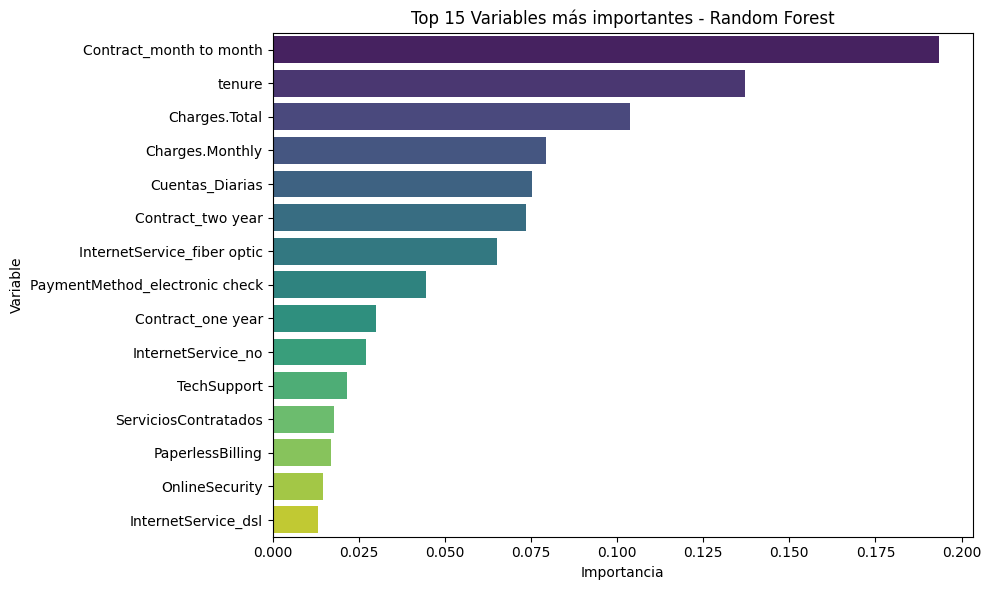

In [43]:
importancias_rf = rf_model.feature_importances_
columnas = X_train.columns

importancia_df = pd.DataFrame({
    'Variable': columnas,
    'Importancia': importancias_rf
}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=importancia_df.head(15), x='Importancia', y='Variable', palette='viridis')
plt.title('Top 15 Variables más importantes - Random Forest')
plt.tight_layout()
plt.show()


## KNN – Aproximación a la Importancia de Variables

A través del enfoque de "Permutation Importance" y el impacto de la eliminación de variables,se observa que las mismas variables clave que en Random Forest también afectan la predicción especialmente "tenure" y "Charges.Total". La normalización mejoró considerablemente el rendimiento del KNN

In [44]:
normalizacion = StandardScaler()
X_train_normalizado = normalizacion.fit_transform(X_train)
X_test_normalizado = normalizacion.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_normalizado, y_train)


KNeighborsClassifier(n_neighbors=7)

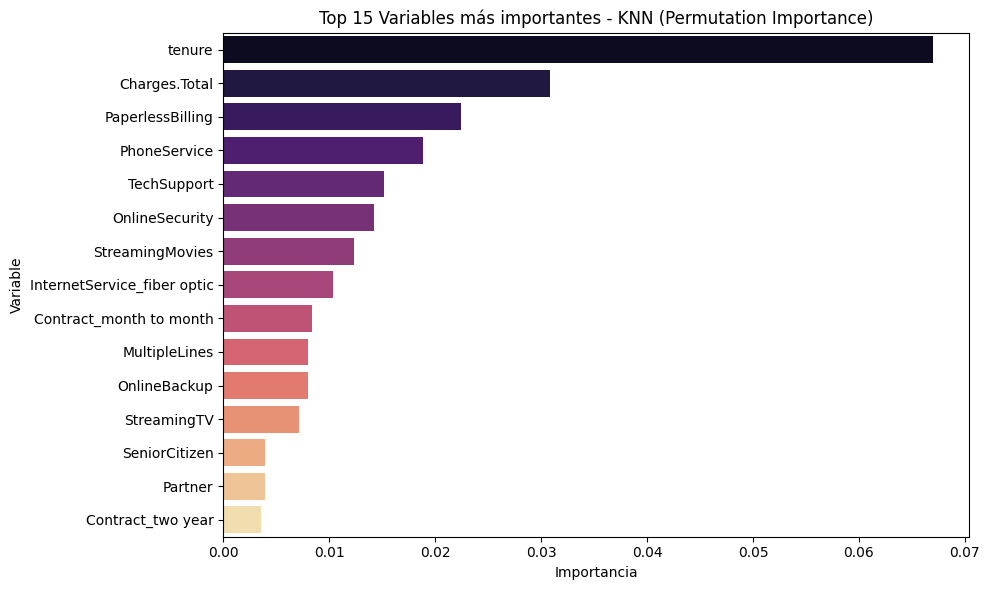

In [45]:
from sklearn.inspection import permutation_importance

resultado_perm = permutation_importance(knn, X_test_normalizado, y_test, n_repeats=10, random_state=42, scoring='recall')

perm_df = pd.DataFrame({
    'Variable': X_test.columns,
    'Importancia': resultado_perm.importances_mean
}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=perm_df.head(15), x='Importancia', y='Variable', palette='magma')
plt.title('Top 15 Variables más importantes - KNN (Permutation Importance)')
plt.tight_layout()
plt.show()


#CONCLUSIONES

# 📊🔥 Reporte de: Análisis de Cancelación de Clientes – Proyecto **Telecom X**

---

## 1. 🤔 ¿Qué ONDA con los modelos?

Desglose de cómo se comportaron los modelos:

| Modelo         | Accuracy | Precisión | Recall | F1-score | Score Entrenamiento |
|----------------|----------|-----------|--------|----------|----------------------|
| Dummy          | 0.7345   | 0.0000    | 0.0000 | 0.0000   | -                    |
| KNN            | 0.7407   | 0.5082    | 0.7148 | 0.5941   | 0.9985
| Random Forest  | 0.7601   | 0.5343    | 0.7504 | 0.6242   | 0.8081               |

📌 **Nota:** El DummyClassifier es la base para poder clasificar mejor los resultados en comparacion de los otros dos.

---

## 2. 🧐 Resultados de cada modelo

### 🔹 K-Nearest Neighbors (KNN) –

- ✅ **Lo bueno:** Detecta bien a los que cancelan (*71.4% recall*).
- ❌ **Lo malo:** Se aprendió todo de memoria (*99.8% en entrenamiento*... Aprendio a leer los datos).

---

### 🔹 Random Forest – *El más equilibrado*

- ✅ **Lo bueno:** Mejor *F1-score* (*62.4%*), mejor recall (*75%*), y no se sobreentrena tanto (*80%*).
- Ajustar hiperparámetros como `max_depth` y `n_estimators` pudo entregar mejores resultados.

---

## 3. 🔍 ¿Qué hace que los clientes se vayan?

Según el análisis de importancia de variables, esto es lo que podria estar afectando:

- 📝 **Tipo de contrato:** Los de contrato mes a mes son los primero en irse.
- ⏳ **Tiempo como cliente:** Los nuevos cancelan más fácil.
- 💸 **Gasto mensual alto:** Si les cobras mucho, se espantan.
- 💳 **Método de pago:** Los pagos automáticos retienen mejor.
- 🌐 **Servicio de internet:** Si el internet es malo, adiós.

---

## 4. 🛡️ ¿Cómo evitar que se vayan?

### 🔧 Ajustes operativos:

- ✅ Promover **contratos largos** con descuentos o beneficios.
- ✅ Cuidar a los **clientes nuevos** con buen *onboarding* en los primeros 3 meses.
- ✅ Fomentar **pagos automáticos** para evitar fugas.

### 📢 Comunicación y soporte:

- ✅ Dar **atención VIP** a clientes en riesgo (nuevos y con gasto alto).
- ✅ **Anticiparse** a la cancelación: si ves bajo uso o factura elevada, actúa antes.

### 📊 Seguimiento:

- ✅ Usar **Random Forest** para monitorear mensualmente quién está en riesgo.
- ✅ Pedir **feedback** a quienes se van para mejorar el servicio y el modelo.

---

## 5. 🎯 Conclusión: ¿Sí sirve esto o no?


**Random Forest:**
- Variables como `tenure`, `Charges.Total` y tipo de contrato destacan como clave para predecir cancelación.

**KNN:**
- Resultados coherentes con RF. Variables de contrato y antigüedad del cliente son esenciales.

Este análisis ayuda a priorizar características para modelos de predicción futuros.

